In [1]:
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing import image
from IPython.display import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dir = 'train'
val_dir = 'test'
test_dir = 'test'


In [3]:
batch_size = 32
img_size = 150

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [5]:
labels = [k for k in train_generator.class_indices]

In [6]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(include_top = False,
                       weights = 'imagenet',
                       input_shape = (img_size,img_size,3))


In [7]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(525, activation='softmax'))

In [8]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

In [9]:
from tensorflow.keras.optimizers import Adam


model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                   )

Epoch 1/10
2645/2645 [==============================] - 6529s 2s/step - loss: 3.9870 - accuracy: 0.2470 - val_loss: 0.9788 - val_accuracy: 0.7463
Epoch 2/10
2645/2645 [==============================] - 3774s 1s/step - loss: 1.5863 - accuracy: 0.6237 - val_loss: 0.4261 - val_accuracy: 0.8865
Epoch 3/10
2645/2645 [==============================] - 6376s 2s/step - loss: 1.0804 - accuracy: 0.7353 - val_loss: 0.2940 - val_accuracy: 0.9154
Epoch 4/10
2645/2645 [==============================] - 3419s 1s/step - loss: 0.8531 - accuracy: 0.7849 - val_loss: 0.2452 - val_accuracy: 0.9295
Epoch 5/10
2645/2645 [==============================] - 3423s 1s/step - loss: 0.7068 - accuracy: 0.8171 - val_loss: 0.2094 - val_accuracy: 0.9390
Epoch 6/10
2645/2645 [==============================] - 3445s 1s/step - loss: 0.6112 - accuracy: 0.8399 - val_loss: 0.2607 - val_accuracy: 0.9288
Epoch 7/10
2645/2645 [==============================] - 3439s 1s/step - loss: 0.5287 - accuracy: 0.8596 - val_loss: 0.2518 -

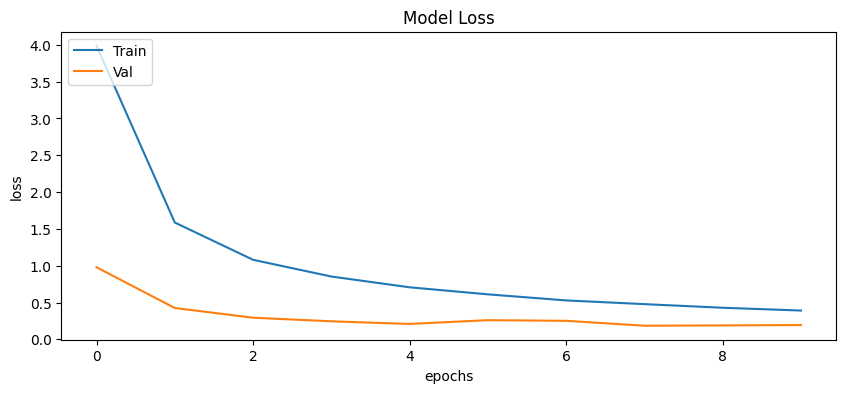

In [11]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

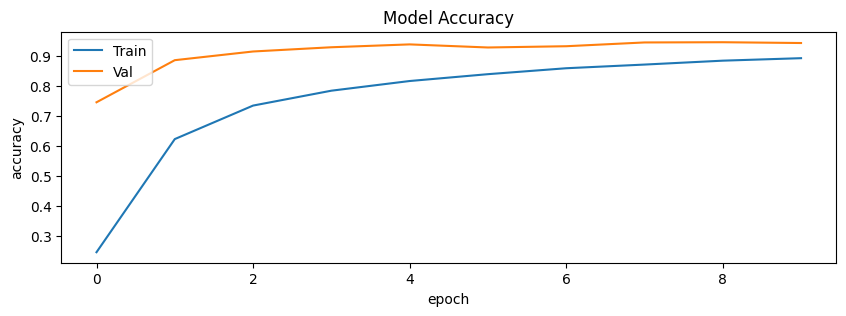

In [12]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [13]:
y_test_1 = test_generator.classes
y_pred_1 = model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

In [14]:
results = model.evaluate(test_generator)

83/83 [==============================] - 20s 240ms/step - loss: 0.1944 - accuracy: 0.9436


In [23]:
results = model.evaluate(train_generator)

2645/2645 [==============================] - 806s 305ms/step - loss: 0.2016 - accuracy: 0.9421


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1,y_pred_1,target_names = labels))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       1.00      0.80      0.89         5
                ABBOTTS BOOBY       1.00      0.80      0.89         5
   ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
            AFRICAN FIREFINCH       1.00      1.00      1.00         5
       AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
        AFRICAN PIED HORNBILL       1.00      0.80      0.89         5
          AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                    ALBATROSS       0.83      1.00      0.91         5
               ALBERTS TOWHEE       1.00      0.80      0.89         5
         ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
                ALPINE CHOUGH       1.00      0.80      0.89         5
     

In [21]:
from PIL import Image
import os

image_directory = 'images to predict'

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

In [22]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : SNOWY OWL
Class probability: 0.9997968
Predicted class for 2.jpg : HOATZIN
Class probability: 0.8808754
Predicted class for 3.jpg : BALD EAGLE
Class probability: 1.0
Predicted class for 4.jpg : PEACOCK
Class probability: 0.99999607
Predicted class for 5.jpg : INDIAN VULTURE
Class probability: 0.9768413


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the new model architecture
new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(64, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(128, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(128, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Flatten())
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(525, activation='softmax'))

# Compile the new model
new_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the new model
new_history = new_model.fit(train_generator,
                            epochs=10,
                            validation_data=validation_generator)

# Evaluate the new model
new_results = new_model.evaluate(test_generator)
print('New model test accuracy:', new_results[1])


Epoch 1/10
2645/2645 [==============================] - 1317s 498ms/step - loss: 5.8134 - accuracy: 0.0158 - val_loss: 4.8286 - val_accuracy: 0.0910
Epoch 2/10
 462/2645 [====>.........................] - ETA: 18:40 - loss: 5.2367 - accuracy: 0.0403